In [1]:
pip install sqlalchemy


Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pymysql


Note: you may need to restart the kernel to use updated packages.


In [3]:
! pip install pyodbc



In [4]:
import pandas as pd

In [5]:
import pyodbc

# Define your connection string
conn = pyodbc.connect(
    "Driver={SQL Server};"
    "Server=LAPTOP-139NSQGL\MSSQL;"  # Replace with your SQL Server name
    "Database=employee_details;"  # Replace with your database name
    "UID=sa;"
    "PWD=akash134;"    # Use 'yes' for Windows Authentication or provide username/password
)

# Create a cursor for executing SQL queries
cursor = conn.cursor()


In [7]:
# Example: Fetch all rows from a table
cursor.execute("SELECT * FROM EmployeeRecords")

# Fetch and print all rows
for row in cursor.fetchall():
    print(row)


(1, 'John', 'Miller', 'HR', Decimal('60000.00'))
(2, 'Jane', 'Smith', 'Finance', Decimal('75000.00'))
(3, 'John', 'Miller', 'HR', Decimal('60000.00'))
(4, 'Emily', 'Davis', 'IT', Decimal('85000.00'))
(5, 'Michael', 'Brown', 'Finance', Decimal('75000.00'))
(6, 'Jane', 'Smith', 'Finance', Decimal('75000.00'))
(7, 'Akash', 'Gupta', 'AI', Decimal('150000.00'))
(8, 'Akash', 'Gupta', 'AI Consultancy', Decimal('150000.00'))


In [15]:
import pandas as pd

# Define your SQL query
query = "SELECT * FROM retail_sales_dataset"

# Use pandas to fetch the data into a DataFrame
df = pd.read_sql(query, conn)

# Display the DataFrame
print(df)


     Transaction_ID        Date Customer_ID  Gender  Age Product_Category  \
0                 1  2023-11-24     CUST001    Male   34           Beauty   
1                 2  2023-02-27     CUST002  Female   26         Clothing   
2                 3  2023-01-13     CUST003    Male   50      Electronics   
3                 4  2023-05-21     CUST004    Male   37         Clothing   
4                 5  2023-05-06     CUST005    Male   30           Beauty   
..              ...         ...         ...     ...  ...              ...   
995             996  2023-05-16     CUST996    Male   62         Clothing   
996             997  2023-11-17     CUST997    Male   52           Beauty   
997             998  2023-10-29     CUST998  Female   23           Beauty   
998             999  2023-12-05     CUST999  Female   36      Electronics   
999            1000  2023-04-12    CUST1000    Male   47      Electronics   

     Quantity  Price_per_Unit  Total_Amount  
0           3              50

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4452\1167999673.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [16]:
df

,Transaction_ID,Date,Customer_ID,Gender,Age,Product_Category,Quantity,Price_per_Unit,Total_Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


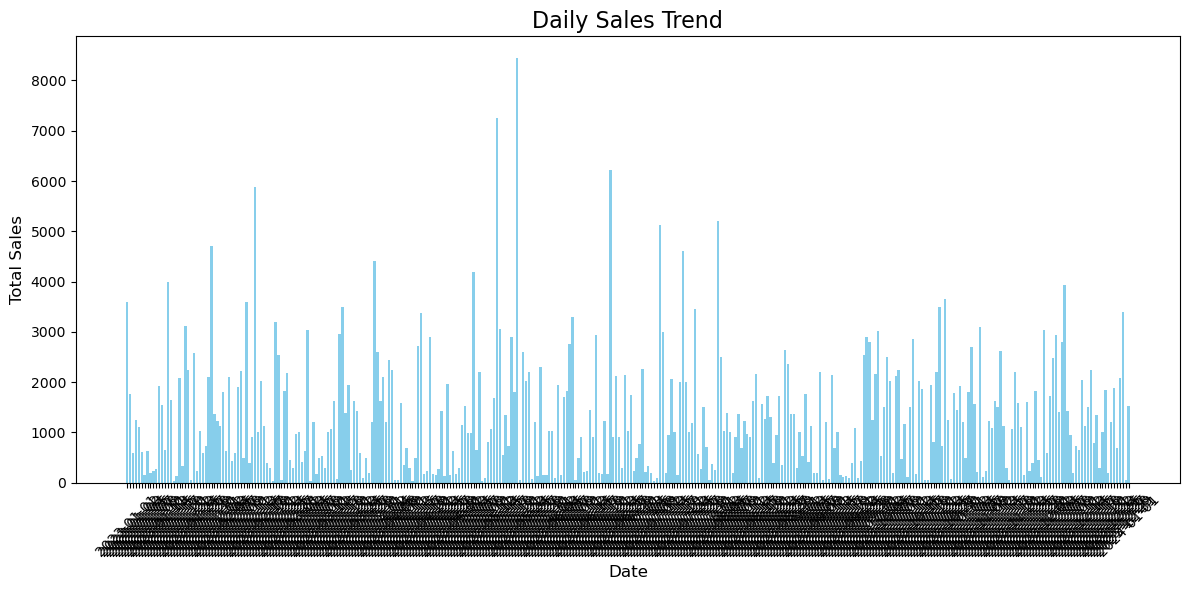

In [20]:
query = """
SELECT Date, SUM(Total_Amount) AS Daily_Sales
FROM retail_sales_dataset
GROUP BY Date
ORDER BY Date;
"""
# Plot daily sales as a bar chart
plt.figure(figsize=(12, 6))
plt.bar(daily_sales_df['Date'], daily_sales_df['Daily_Sales'], color='skyblue')
plt.title('Daily Sales Trend', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()



#  Gender-based Analysis

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4452\452066315.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  gender_df = pd.read_sql(query, conn)


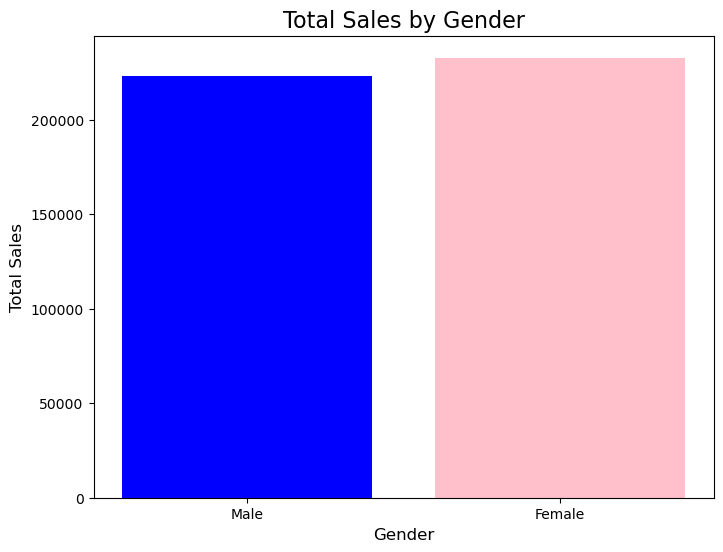

In [22]:
query = """
SELECT Gender, COUNT(Transaction_ID) AS Transactions, SUM(Total_Amount) AS Total_Sales
FROM retail_sales_dataset
GROUP BY Gender;
"""
gender_df = pd.read_sql(query, conn)

# Visualize sales by gender
plt.figure(figsize=(8, 6))
plt.bar(gender_df['Gender'], gender_df['Total_Sales'], color=['blue', 'pink'])
plt.title('Total Sales by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.show()


# Age Group Analysis

In [24]:
import seaborn as sns

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4452\3828277464.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  age_group_df = pd.read_sql(query, conn)


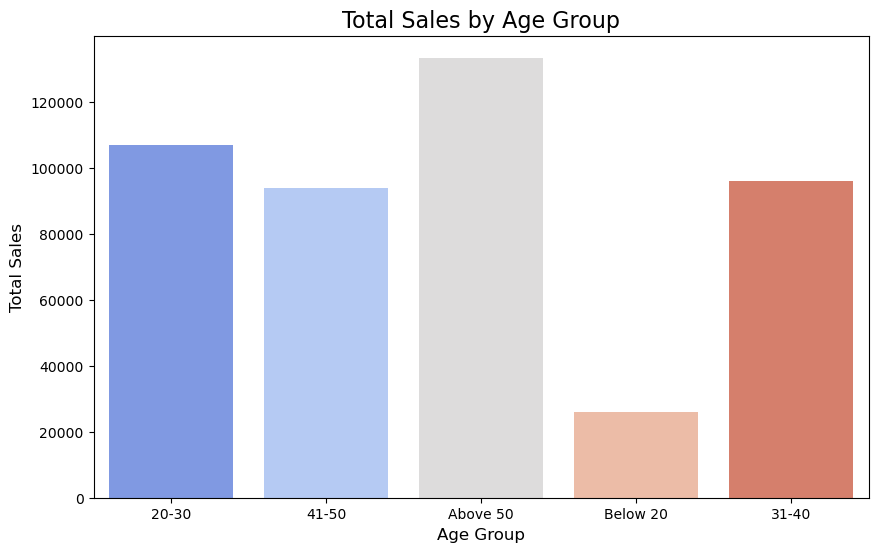

In [25]:
query = """
SELECT 
    CASE 
        WHEN Age < 20 THEN 'Below 20'
        WHEN Age BETWEEN 20 AND 30 THEN '20-30'
        WHEN Age BETWEEN 31 AND 40 THEN '31-40'
        WHEN Age BETWEEN 41 AND 50 THEN '41-50'
        ELSE 'Above 50'
    END AS Age_Group,
    COUNT(Transaction_ID) AS Transactions,
    SUM(Total_Amount) AS Total_Sales
FROM retail_sales_dataset
GROUP BY 
    CASE 
        WHEN Age < 20 THEN 'Below 20'
        WHEN Age BETWEEN 20 AND 30 THEN '20-30'
        WHEN Age BETWEEN 31 AND 40 THEN '31-40'
        WHEN Age BETWEEN 41 AND 50 THEN '41-50'
        ELSE 'Above 50'
    END;
"""
age_group_df = pd.read_sql(query, conn)

# Visualize sales by age group
plt.figure(figsize=(10, 6))
sns.barplot(x='Age_Group', y='Total_Sales', data=age_group_df, palette='coolwarm')
plt.title('Total Sales by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.show()


# Sales by Product Category

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4452\3373084964.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  product_category_df = pd.read_sql(query, conn)


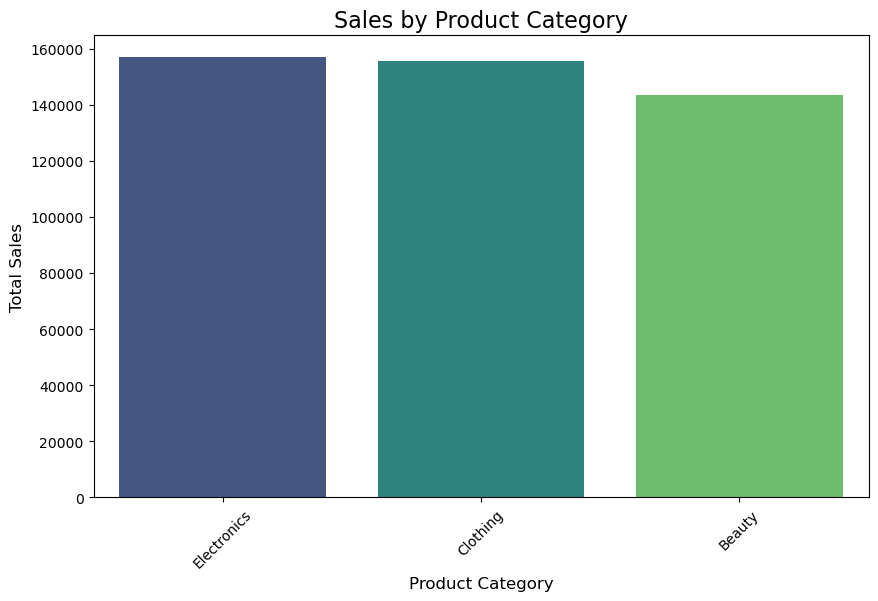

In [26]:
query = """
SELECT Product_Category, COUNT(Transaction_ID) AS Transactions, SUM(Total_Amount) AS Total_Sales
FROM retail_sales_dataset
GROUP BY Product_Category
ORDER BY Total_Sales DESC;
"""
product_category_df = pd.read_sql(query, conn)

# Visualize product category sales
plt.figure(figsize=(10, 6))
sns.barplot(x='Product_Category', y='Total_Sales', data=product_category_df, palette='viridis')
plt.title('Sales by Product Category', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45)
plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4452\2071535658.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  top_customers_df = pd.read_sql(query, conn)


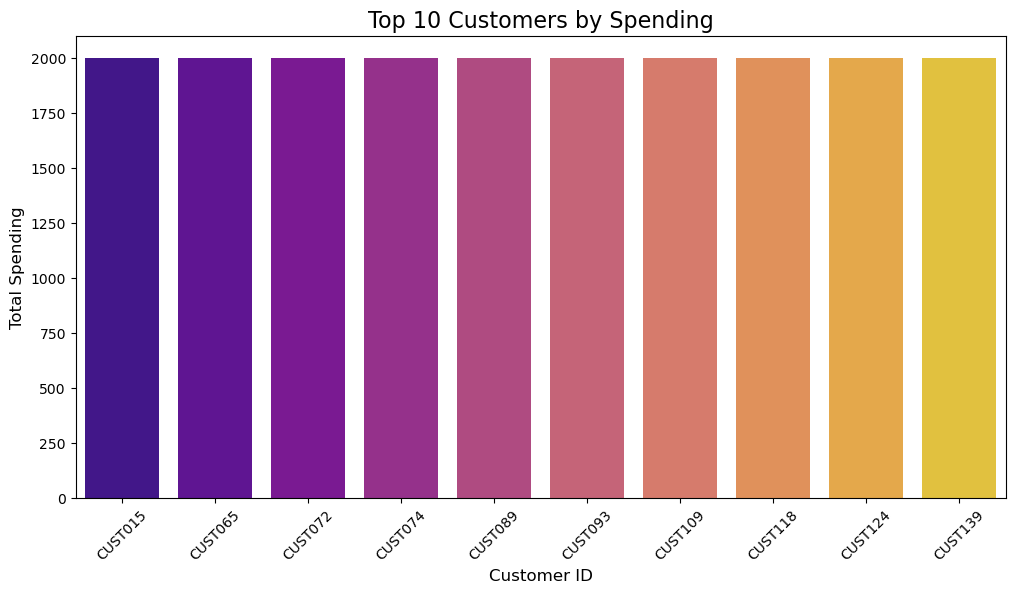

In [28]:
query = """
SELECT TOP 10 Customer_ID, SUM(Total_Amount) AS Total_Spending, COUNT(Transaction_ID) AS Transactions
FROM retail_sales_dataset
GROUP BY Customer_ID
ORDER BY Total_Spending DESC;
"""
top_customers_df = pd.read_sql(query, conn)

# Visualize top customers
plt.figure(figsize=(12, 6))
sns.barplot(x='Customer_ID', y='Total_Spending', data=top_customers_df, palette='plasma')
plt.title('Top 10 Customers by Spending', fontsize=16)
plt.xlabel('Customer ID', fontsize=12)
plt.ylabel('Total Spending', fontsize=12)
plt.xticks(rotation=45)
plt.show()



In [29]:
query = """
SELECT AVG(Total_Amount) AS Avg_Spend_Per_Transaction
FROM retail_sales_dataset;
"""
avg_spend_df = pd.read_sql(query, conn)
print("Average Spend per Transaction: {:.2f}".format(avg_spend_df['Avg_Spend_Per_Transaction'][0]))


Average Spend per Transaction: 456.00


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4452\3281445433.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  avg_spend_df = pd.read_sql(query, conn)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4452\671689941.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  common_products_df = pd.read_sql(query, conn)


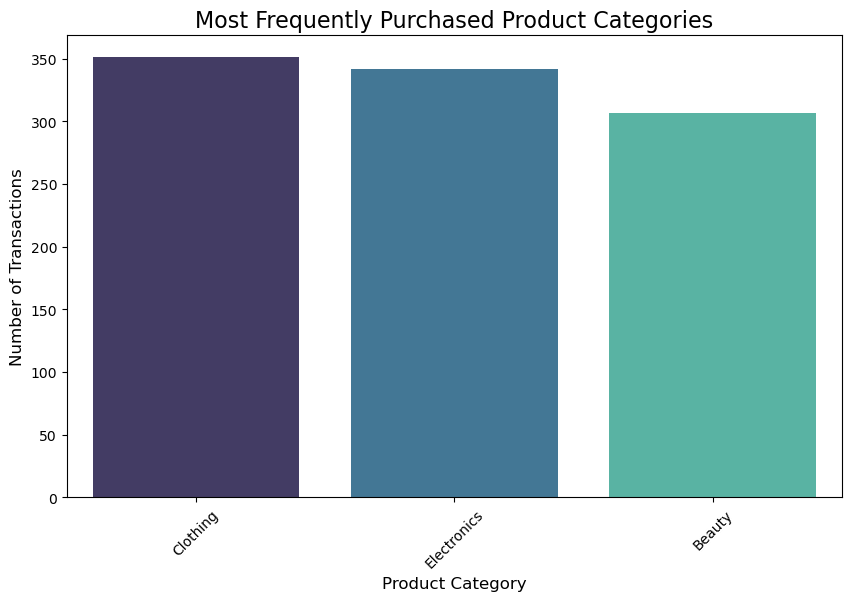

In [30]:
query = """
SELECT Product_Category, COUNT(Transaction_ID) AS Transactions
FROM retail_sales_dataset
GROUP BY Product_Category
ORDER BY Transactions DESC;
"""
common_products_df = pd.read_sql(query, conn)

# Visualize most common product categories
plt.figure(figsize=(10, 6))
sns.barplot(x='Product_Category', y='Transactions', data=common_products_df, palette='mako')
plt.title('Most Frequently Purchased Product Categories', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.xticks(rotation=45)
plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4452\671689941.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  common_products_df = pd.read_sql(query, conn)


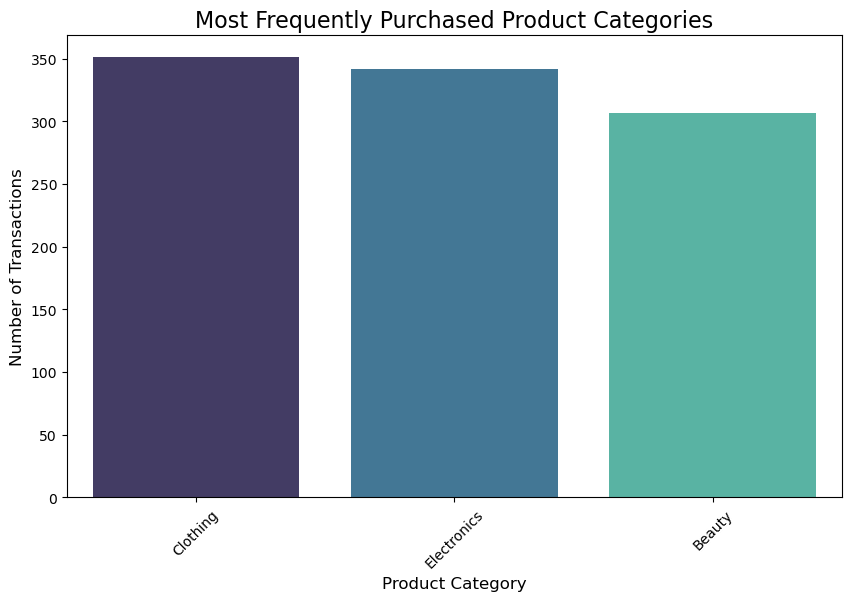

In [31]:
query = """
SELECT Product_Category, COUNT(Transaction_ID) AS Transactions
FROM retail_sales_dataset
GROUP BY Product_Category
ORDER BY Transactions DESC;
"""
common_products_df = pd.read_sql(query, conn)

# Visualize most common product categories
plt.figure(figsize=(10, 6))
sns.barplot(x='Product_Category', y='Transactions', data=common_products_df, palette='mako')
plt.title('Most Frequently Purchased Product Categories', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.xticks(rotation=45)
plt.show()
